TypeError: 'int' object is not iterable

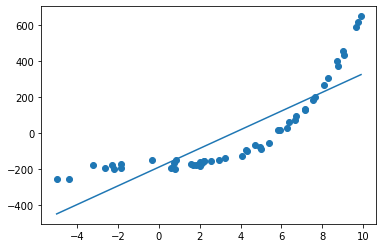

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#Return fitted model parameters to the dataset at datapath for each choice in degrees.
#Input: datapath as a string specifying a .txt file, degrees as a list of positive integers.
#Output: paramFits, a list with the same length as degrees, where paramFits[i] is the list of
#coefficients when fitting a polynomial of d = degrees[i].
def main(datapath, degrees):
    paramFits = []
    result = []
    X =[]
    Y  = []
    
    

    #fill in
    #read the input file, assuming it has two columns, where each row is of the form [x y] as
    #in poly.txt.
    #iterate through each n in degrees, calling the feature_matrix and least_squares functions to solve
    #for the model parameters in each case. Append the result to paramFits each time.
    myfile = open(datapath).read().splitlines();

    for line in myfile:
        result.append( line.split('\t',maxsplit = 1))


    for x in range(0,len(result)):
        X.append(float(result[x][0]))
        Y.append(float(result[x][1]))
    i = 0;
    for d in degrees:
        feat_matrix = (feature_matrix(X,d))

        paramFits.append( least_squares(feat_matrix,Y))
        
    return paramFits


#Return the feature matrix for fitting a polynomial of degree d based on the explanatory variable
#samples in x.
#Input: x as a list of the independent variable samples, and d as an integer.
#Output: X, a list of features for each sample, where X[i][j] corresponds to the jth coefficient
#for the ith sample. Viewed as a matrix, X should have dimension #samples by d+1.
def feature_matrix(x, d):

    #fill in
    #There are several ways to write this function. The most efficient would be a nested list comprehension
    #which for each sample in x calculates x^d, x^(d-1), ..., x^0.
    X  = [];
    for a in x:
        z = []
        for y in range(0,d + 1):
            z.append(a ** (d - y))
        X.append(z)



    return X


#Return the least squares solution based on the feature matrix X and corresponding target variable samples in y.
#Input: X as a list of features for each sample, and y as a list of target variable samples.
#Output: B, a list of the fitted model parameters based on the least squares solution.
def least_squares(X, y):
    X = np.array(X)
    y = np.array(y)


    #fill in
    #Use the matrix algebra functions in numpy to solve the least squares equations. This can be done in just one line.
    z = (np.linalg.inv((X.T @ X)) @ X.T @ y)


    B = z.tolist()

    for i in range(0,len(B)):
        B[i] = round(B[i],6)
    return B

if __name__ == '__main__':
    datapath = 'poly.txt'
    degrees = [1,2,3,4,5]

    paramFits = main(datapath, degrees)
    data = np.loadtxt(datapath,usecols = (0,1))
    X = data[:,0]
    y = data[:,1]
    plt.scatter(X,y,label = 'actual data')
    X.sort()
    
    for i in paramFits:
        x1 = feature_matrix(X,len(i)- 1)
        x1 = np.array(x1)
        
        
        y = np.dot(x1,i)
        label = 'd = '+ str(len(i) - 1)
        plt.plot(X,y,label = label)
        plt.legend(len(i),label = str(len(i)))
    print(paramFits)
    
    

